# Prosper Dataset Exploration
## by Daniel Chang

## Introduction
> **This document explores a dataset, provided by Prosper, that contains 113,937 loans with 81 variables on each loans, including loan amount, borrower rate, current loan status, borrower income, amongst others.** 


## Preliminary Wrangling


In [20]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

**Loading  dataset and describe its properties through the questions below.** 


In [7]:
loan_df = pd.read_csv('prosperLoanData.csv')
loan_df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [8]:
loan_df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

**There are way too many columns and not all of them are needed. So, we will create a subset with all the columns/features that interest us for this project.**

In [9]:
cols = ['LoanStatus', 'BorrowerAPR', 'EmploymentStatus', 'StatedMonthlyIncome',
        'IncomeVerifiable', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Term', 'ProsperRating (Alpha)']
loan_subset = loan_df[cols]

In [10]:
loan_subset.sample(20)

,LoanStatus,BorrowerAPR,EmploymentStatus,StatedMonthlyIncome,IncomeVerifiable,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperRating (Alpha)
80709,Current,0.14816,Employed,10000.000000,True,0.26,10000,36,A
103700,Current,0.15223,Employed,4576.416667,True,0.29,15000,36,A
32744,Current,0.12782,Employed,16500.000000,True,0.05,15000,36,A
8450,Current,0.15833,Employed,8750.000000,True,0.13,15000,36,A
6317,Completed,0.35797,Other,6000.000000,True,0.56,4000,36,HR
38861,Current,0.22283,Employed,5416.666667,True,0.37,7500,60,C
20294,Completed,0.09437,Not available,3333.333333,True,0.19,10000,36,NaN
4688,Current,0.12081,Self-employed,8333.333333,False,NaN,5000,36,A
82264,Current,0.34408,Full-time,7333.333333,True,0.28,4000,60,E
33442,Current,0.14243,Employed,7000.000000,True,0.32,15000,36,A


In [11]:
loan_subset.shape

(113937, 9)

In [12]:
loan_subset.describe()

,BorrowerAPR,StatedMonthlyIncome,DebtToIncomeRatio,LoanOriginalAmount,Term
count,113912.000000,1.139370e+05,105383.000000,113937.00000,113937.000000
mean,0.218828,5.608026e+03,0.275947,8337.01385,40.830248
std,0.080364,7.478497e+03,0.551759,6245.80058,10.436212
min,0.006530,0.000000e+00,0.000000,1000.00000,12.000000
25%,0.156290,3.200333e+03,0.140000,4000.00000,36.000000
50%,0.209760,4.666667e+03,0.220000,6500.00000,36.000000
75%,0.283810,6.825000e+03,0.320000,12000.00000,36.000000
max,0.512290,1.750003e+06,10.010000,35000.00000,60.000000


### What is the structure of your dataset?

> **This dataset contains 113,937 loans with 81 columns.**

### What is/are the main feature(s) of interest in your dataset?

> **In this project, I am interested in solving the question "What affects the borrower's APR?". Therefore, the features that I'm most interested in are those that I deem best for predicting the borrower's APR.**

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> **I expect the following to have effects on the APR: LoanStatus, EmploymentStatus, StatedMonthlyIncome, IncomeVerifiable, DebtToIncomeRatio, LoanOriginalAmount, Term and 'ProsperRating (Alpha)'. However, I 100% expect that the total loan amount will have a effect on the APR. The larger the loan is, the lower the APR I expect.**

## Univariate Exploration

### Borrower APR
**For the first chart, we will examine the distribution of 'Borrower APR', using a histogram.**

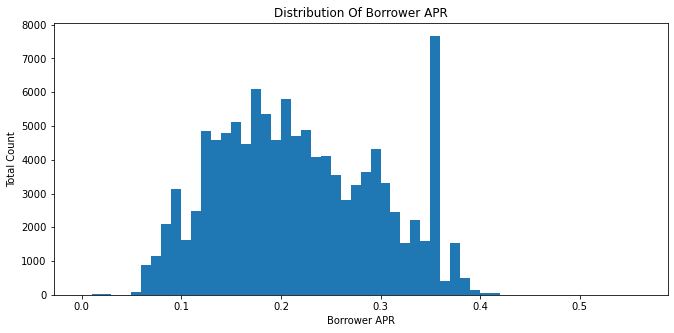

In [13]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 11, 5
bins = np.arange(0, loan_subset.BorrowerAPR.max() + 0.05, 0.01)
plt.hist(data = loan_subset, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Total Count')
plt.title('Distribution Of Borrower APR')
plt.grid(False);

In [14]:
loan_subset[loan_subset.BorrowerAPR > 0.42]

,LoanStatus,BorrowerAPR,EmploymentStatus,StatedMonthlyIncome,IncomeVerifiable,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperRating (Alpha)
18326,Defaulted,0.45857,NaN,10000.000000,True,0.10252,3000,36,NaN
22195,Chargedoff,0.46201,NaN,2916.666667,True,0.35430,1789,36,NaN
36018,Completed,0.51229,NaN,2838.000000,True,0.02852,1500,36,NaN
56761,Defaulted,0.50633,NaN,0.000000,False,0.03909,3000,36,NaN
82043,Defaulted,0.48873,NaN,1583.333333,True,0.10021,3000,36,NaN
103973,Defaulted,0.45857,NaN,3750.000000,True,0.19413,2800,36,NaN
105889,Chargedoff,0.42395,Employed,2250.000000,True,0.08000,1000,36,HR


**The distribution looks multimodal with small peaks at 0.1 and a bigger one at 0.2. Afterward, it goes on a downward trend with a peak at 0.3 and a sudden spike at 0.35. There are barely any loans above 0.42.**

### Stated Monthly Income
**Next, we will examine the distribution of 'StatedMonthlyIncome'.**

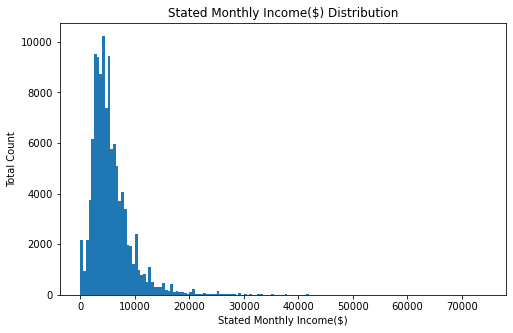

In [15]:
rcParams['figure.figsize'] = 8, 5

income_bins = np.arange(0, 75000, 500)
plt.hist(data = loan_subset, x='StatedMonthlyIncome', bins = income_bins);
plt.xlabel('Stated Monthly Income($)')
plt.ylabel('Total Count')
plt.title('Stated Monthly Income($) Distribution');

**From the chart, we can see that the distribution of stated monthly income is right-skewed. Many of the loans are less than $30k.**

### Loan Status
**Next, we will examine the distribution of loan statuses.**

In [16]:
loan_subset['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [21]:
# earlier I noticed that were multiple "Past Due" variations when I sampled the dataset(result may be different now)
# group all values in "LoanStatus" containing "Past Due " and replace with "Past Due"
loan_subset.loc[loan_subset['LoanStatus'].str.contains('Past Due '), 'LoanStatus'] = 'Past Due'
loan_subset[loan_subset['LoanStatus']=="Past Due"]

,LoanStatus,BorrowerAPR,EmploymentStatus,StatedMonthlyIncome,IncomeVerifiable,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperRating (Alpha)
12,Past Due,0.17969,Employed,2416.666667,True,0.18,4000,36,B
82,Past Due,0.33286,Employed,4166.666667,True,0.12,4000,36,E
139,Past Due,0.33973,Other,1835.416667,True,0.41,2500,36,E
508,Past Due,0.30532,Employed,2099.000000,True,0.13,4500,36,D
597,Past Due,0.17849,Employed,5533.333333,True,0.30,23500,60,A
...,...,...,...,...,...,...,...,...,...
113697,Past Due,0.28728,Employed,7583.333333,True,0.28,4000,36,D
113700,Past Due,0.27285,Employed,14000.000000,True,0.22,12500,36,D
113748,Past Due,0.31790,Other,5445.000000,True,0.10,4000,36,E
113769,Past Due,0.31790,Employed,6333.333333,True,0.20,2600,36,E


In [22]:
# set dtype of 'LoanStatus' to category
loanstatus_order = loan_subset['LoanStatus'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = loanstatus_order)
loan_subset['LoanStatus'] = loan_subset['LoanStatus'].astype(ordered_var)
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   LoanStatus             113937 non-null  category
 1   BorrowerAPR            113912 non-null  float64 
 2   EmploymentStatus       111682 non-null  object  
 3   StatedMonthlyIncome    113937 non-null  float64 
 4   IncomeVerifiable       113937 non-null  bool    
 5   DebtToIncomeRatio      105383 non-null  float64 
 6   LoanOriginalAmount     113937 non-null  int64   
 7   Term                   113937 non-null  int64   
 8   ProsperRating (Alpha)  84853 non-null   object  
dtypes: bool(1), category(1), float64(3), int64(2), object(2)
memory usage: 6.3+ MB


In [23]:
status_ordered = loan_subset.LoanStatus.value_counts().sort_values(ascending = True)
status_ordered

Cancelled                     5
FinalPaymentInProgress      205
Past Due                   2067
Defaulted                  5018
Chargedoff                11992
Completed                 38074
Current                   56576
Name: LoanStatus, dtype: int64

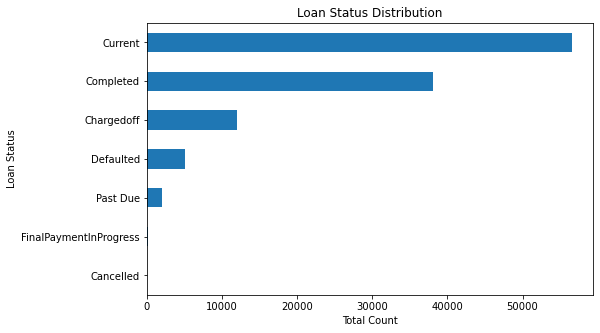

In [24]:
rcParams['figure.figsize'] = 8, 5
status_ordered.plot(kind = 'barh', grid = False)
plt.ylabel('Loan Status')
plt.xlabel('Total Count')
plt.title('Loan Status Distribution');

**It seems that the vast majority of loans are marked as 'current', followed by 'Completed' and 'Charged off'. Even though there are alot more 'Defaulted' than all the 'Past Dues' put together, it seems like most people pay their loans on time.**

### Income Verifiable
**In my next examination, I am going to take a look at 'IncomeVerifiable' column. I am interested to see what proportion of all incomes in the dataset have been verified.**

In [25]:
income_order = loan_subset['IncomeVerifiable'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = income_order)
loan_subset['IncomeVerifiable'] = loan_subset['IncomeVerifiable'].astype(ordered_var)
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   LoanStatus             113937 non-null  category
 1   BorrowerAPR            113912 non-null  float64 
 2   EmploymentStatus       111682 non-null  object  
 3   StatedMonthlyIncome    113937 non-null  float64 
 4   IncomeVerifiable       113937 non-null  category
 5   DebtToIncomeRatio      105383 non-null  float64 
 6   LoanOriginalAmount     113937 non-null  int64   
 7   Term                   113937 non-null  int64   
 8   ProsperRating (Alpha)  84853 non-null   object  
dtypes: category(2), float64(3), int64(2), object(2)
memory usage: 6.3+ MB


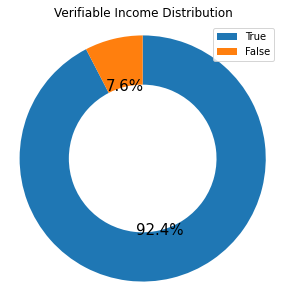

In [26]:
# I used this link for help:
# https://stackoverflow.com/questions/65489805/pie-missing-1-required-positional-argument-x
textprops = {"fontsize":15}
sorted_verify = pd.DataFrame(loan_subset['IncomeVerifiable'].value_counts().reset_index())
labels = sorted_verify['index']

plt.pie(data = sorted_verify, x='IncomeVerifiable', labels = None, startangle = 90,
        counterclock = False, wedgeprops = {'width': 0.4}, autopct='%.1f%%', textprops =textprops);
plt.axis('square');
plt.title('Verifiable Income Distribution')
plt.legend(labels);

**From the donut plot, we can see that the majority of borrowers' incomes are verifiable (represented as True), 92.4%. Only 7.2% are unverifiable.**

### Employment Status
**Next up is the 'EmploymentStatus' column.**

In [27]:
# set dtype of 'EmploymentStatus' to category
employ_order = loan_subset['EmploymentStatus'].value_counts().index
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = employ_order)
loan_subset['EmploymentStatus'] = loan_subset['EmploymentStatus'].astype(ordered_var)
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   LoanStatus             113937 non-null  category
 1   BorrowerAPR            113912 non-null  float64 
 2   EmploymentStatus       111682 non-null  category
 3   StatedMonthlyIncome    113937 non-null  float64 
 4   IncomeVerifiable       113937 non-null  category
 5   DebtToIncomeRatio      105383 non-null  float64 
 6   LoanOriginalAmount     113937 non-null  int64   
 7   Term                   113937 non-null  int64   
 8   ProsperRating (Alpha)  84853 non-null   object  
dtypes: category(3), float64(3), int64(2), object(1)
memory usage: 5.5+ MB


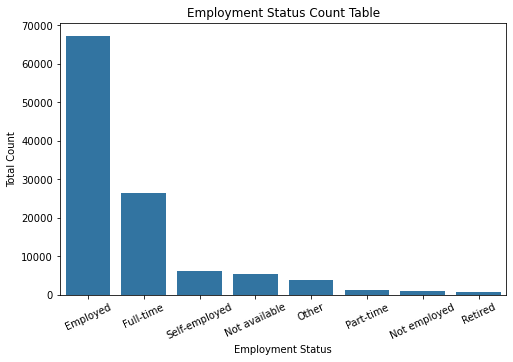

In [28]:
base_color = sb.color_palette()[0]

# plot the data
sb.countplot(data = loan_subset, x = 'EmploymentStatus', color = base_color)
plt.xticks(rotation = 25)
plt.title('Employment Status Count Table')
plt.xlabel('Employment Status')
plt.ylabel('Total Count')
plt.grid(False);

**From the chart, we can see that most people who were approved of loans are considered 'employed', followed by 'Full-Time'. The ones who were approved are working in some form or another since those are 'not employed' or retired make up a small portion of the overall loans. We should also be aware of the missing information, marked as 'not available'.**

### Terms
**Next up is the 'Term' column.**

In [29]:
# set dtype of 'Term' to category
term_order = [12, 36, 60]
ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                           categories = term_order)
loan_subset['Term'] = loan_subset['Term'].astype(ordered_var)
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   LoanStatus             113937 non-null  category
 1   BorrowerAPR            113912 non-null  float64 
 2   EmploymentStatus       111682 non-null  category
 3   StatedMonthlyIncome    113937 non-null  float64 
 4   IncomeVerifiable       113937 non-null  category
 5   DebtToIncomeRatio      105383 non-null  float64 
 6   LoanOriginalAmount     113937 non-null  int64   
 7   Term                   113937 non-null  category
 8   ProsperRating (Alpha)  84853 non-null   object  
dtypes: category(4), float64(3), int64(1), object(1)
memory usage: 4.8+ MB


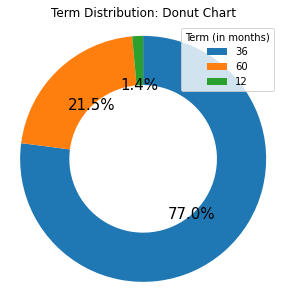

In [30]:
sorted_term = pd.DataFrame(loan_subset['Term'].value_counts().reset_index())
labels = sorted_term['index']
textprops = {"fontsize":15}

plt.pie(data = sorted_term, x = 'Term', labels = None, startangle = 90,
        counterclock = False, wedgeprops = {'width': 0.4}, autopct='%.1f%%',
       textprops = textprops)
plt.axis('square')
plt.title('Term Distribution: Donut Chart')
plt.legend(labels, title = 'Term (in months)');

**From the donut chart, we see that 77% of all loan terms are 36 months, followed by 60 months at 21.5% and 12 months at 1.4%.**

### Loan Original Amount

In [31]:
loan_subset['LoanOriginalAmount'].describe()

count    113937.00000
mean       8337.01385
std        6245.80058
min        1000.00000
25%        4000.00000
50%        6500.00000
75%       12000.00000
max       35000.00000
Name: LoanOriginalAmount, dtype: float64

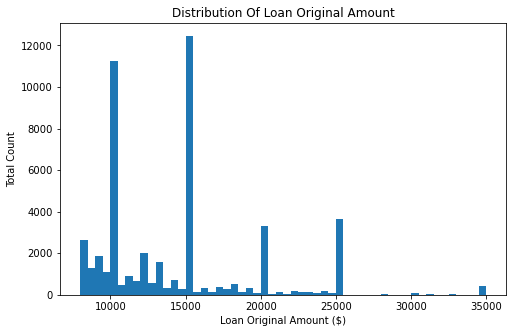

In [32]:
# use the mean as the starting point
bins = np.arange(8000, loan_subset['LoanOriginalAmount'].max()+500, 500)
plt.hist(data = loan_subset, x = 'LoanOriginalAmount', bins = bins);
plt.xlabel('Loan Original Amount ($)')
plt.ylabel('Total Count')
plt.title('Distribution Of Loan Original Amount')
plt.grid(False);

**There are very large spikes at 10k, 15k, 20k, 25k and 35k.However, it seems like a large number of the loans are all in multiples of 500.**

### Debt-To-Income Ratio

In [33]:
loan_subset.DebtToIncomeRatio.describe()

count    105383.000000
mean          0.275947
std           0.551759
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

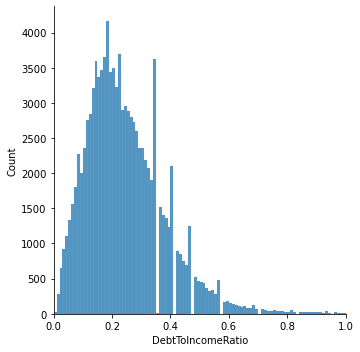

In [34]:
# first lets examine the distribution where DebtToIncomeRatio <= 1
bin_edges = np.arange(0, loan_subset.DebtToIncomeRatio.max() + 0.01, 0.01)
sb.displot(loan_subset.DebtToIncomeRatio, kde = False, bins = bin_edges)
plt.xlim((0, 1))
plt.grid(False);

In [35]:
# examining the number of rows where DebtToIncomeRatio > 1 (799 rows)
# though we can drop these, I have chosen not to because I am interested in studying datas that show high leverages
# furthermore, I like to study anamolies

loan_subset[loan_subset['DebtToIncomeRatio'] > 1]

,LoanStatus,BorrowerAPR,EmploymentStatus,StatedMonthlyIncome,IncomeVerifiable,DebtToIncomeRatio,LoanOriginalAmount,Term,ProsperRating (Alpha)
22,Current,0.35356,Other,118.333333,True,9.20,4000,36,HR
226,Completed,0.11749,Full-time,0.083333,False,10.01,1000,36,NaN
368,Completed,0.20735,Full-time,1083.333333,True,1.65,16000,36,NaN
419,Defaulted,0.35356,Other,1061.000000,True,1.26,4000,36,HR
576,Completed,0.10505,Retired,0.083333,False,10.01,1500,36,NaN
...,...,...,...,...,...,...,...,...,...
113387,Completed,0.39153,Employed,4000.000000,True,2.38,1500,36,HR
113407,Completed,0.25163,Full-time,233.333333,True,2.16,1386,36,NaN
113486,Current,0.35643,Employed,441.666667,True,1.05,2500,36,HR
113626,Completed,0.17722,NaN,0.083333,False,10.01,25000,36,NaN


**From the plot, we can see that the distribution of Debt-To-Income Ratio is right-skewed when it is less than or equal 1. However, there are about 799 more entries where it is larger than 1; it still wouldn't change that fact that the distribution will be right-skewed, even if we add these data to the graph. Furthermore, we can see that there are some drastic drops in counts as the ratio approaches 0.4. The drops happened at around 0.36, 0.41, 0.46 and 0.57. There are some smallers drops after 0.6**

### Prosper Rating

In [36]:
rating_order = ['HR', 'E', 'D', 'C', 'B', 'A', 'AA']
ordered_var = pd.api.types.CategoricalDtype(categories = rating_order, ordered = True)
loan_subset['ProsperRating (Alpha)'] = loan_subset['ProsperRating (Alpha)'].astype(ordered_var)
loan_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   LoanStatus             113937 non-null  category
 1   BorrowerAPR            113912 non-null  float64 
 2   EmploymentStatus       111682 non-null  category
 3   StatedMonthlyIncome    113937 non-null  float64 
 4   IncomeVerifiable       113937 non-null  category
 5   DebtToIncomeRatio      105383 non-null  float64 
 6   LoanOriginalAmount     113937 non-null  int64   
 7   Term                   113937 non-null  category
 8   ProsperRating (Alpha)  84853 non-null   category
dtypes: category(5), float64(3), int64(1)
memory usage: 4.0 MB


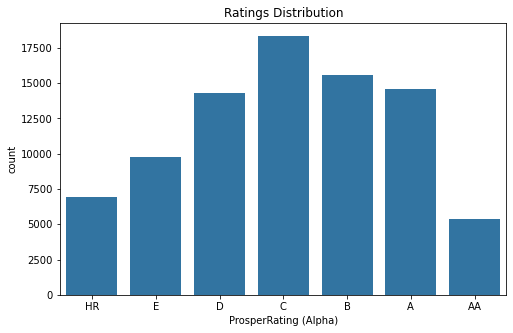

In [37]:
base_color = sb.color_palette()[0]
sb.countplot(data = loan_subset, x = 'ProsperRating (Alpha)', color = base_color)
plt.title('Ratings Distribution')
plt.grid(False);

**It seems that most borrowers are between the ratings, D - A.**

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The main variable that I am interested in is **Borrower APR**. Rexamining the plot, we can see that the distribution looks multimodal with small peaks at 0.1 and a bigger one at 0.2. Afterward, it goes on a downward trend with a peak at 0.3 and a sudden spike at 0.35. There are barely any loans above 0.42. Unless we count the outliers (APR > 4.2), there are no unusual points. I made a couple transformation. First, I converted a couple coulmns into 'category' datetype, then I grouped all the different values in the "LoanStatus" that contains the string "Past Due " into a single value to make it easier to read.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> **Stated Monthly Income:** The distribution of stated monthly income is right-skewed. Many of the loans are less than $30k, but there are some points that are much higher.

> **Loan Status:** The vast majority of loans are marked as 'current', followed by 'Completed' and 'Charged off'. Even though there are alot more 'Defaulted' than all the 'Past Dues' put together, it seems like most people pay their loans on time.

> **Income Verifiable:** The majority of borrowers' incomes are verifiable (represented as True), 92.4%. Only 7.2% are unverifiable.

> **Employment Status:** Most people who were approved of loans are considered 'employed', followed by 'Full-Time'. The ones who were approved are working in some form or another since those are 'not employed' or retired make up a small portion of the overall loans. We should also be aware of the missing information, marked as 'not available'.

> **Term:** 77% of all loan terms are 36 months, followed by 60 months at 21.5% and 12 months at 1.4%.

> **Loan Original Amount:** There are very large spikes at 10k, 15k, 20k, 25k and 35k.However, it seems like a large number of the loans are all in multiples of 500.

> **Debt-To-Income Ratio:**  The distribution of Debt-To-Income Ratio is right-skewed when it is less than or equal 1. However, there are about 799 more entries where it is larger than 1; it still wouldn't change that fact that the distribution will be right-skewed, even if we add these data to the graph. Furthermore, we can see that there are some drastic drops in counts as the ratio approaches 0.4. The drops happened at around 0.36, 0.41, 0.46 and 0.57. There are some smallers drops after 0.6

> **Prosper Rating:** According the distribution plot, most borrowers are between the ratings, D - A.

## Bivariate Exploration

**In this section, I will investigate relationships between pairs of variables in your data. First, I will examine the pairwise correlations between the numeric features that we are interested in.**

### Numeric Variables Observation

In [38]:
num_var = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'DebtToIncomeRatio']
cat_var = ['LoanStatus', 'IncomeVerifiable', 'EmploymentStatus', 'Term', 'ProsperRating (Alpha)']

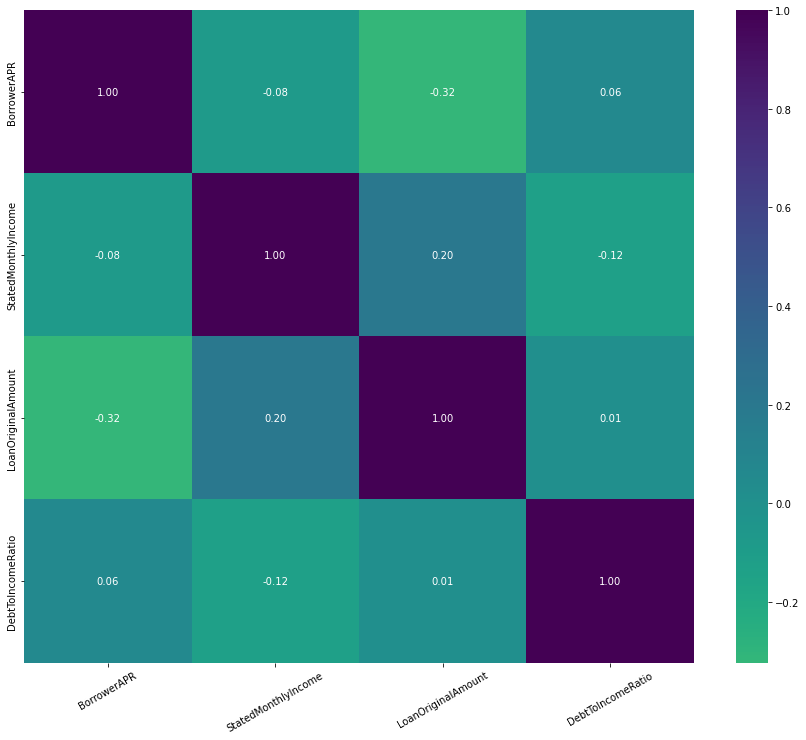

In [40]:
fig, ax = plt.subplots(figsize = [15,12])
sb.heatmap(loan_subset[num_var].corr(), annot = True, fmt = '0.2f',
          cmap = 'viridis_r', center = 0)
plt.xticks(rotation = 30);

**It seems like I was correct to expect that the borrower APR and the original loan amount were negatively correlated, meaning that the higher the loan, the lower the APR. From the heatmap, we can see that the correlation coefficient between the two variables is -0.32. The relationship between Debt-to-Income Ratio and Stated Monthly Income is also negatively correlated.Something else we can make out is that the correlation between the original loan amount and stated monthly income is 0.20, meaning that it's positively correlated. This makes sense since the higher the income, the higher the loan you should be able to acquire.**

### Numeric Variables vs. Categorical Variables (Quantitative vs. Qualitative)
**Next, I will examine how the numeric variables -mainly, borrower APR- correlate to the categorical variables.**

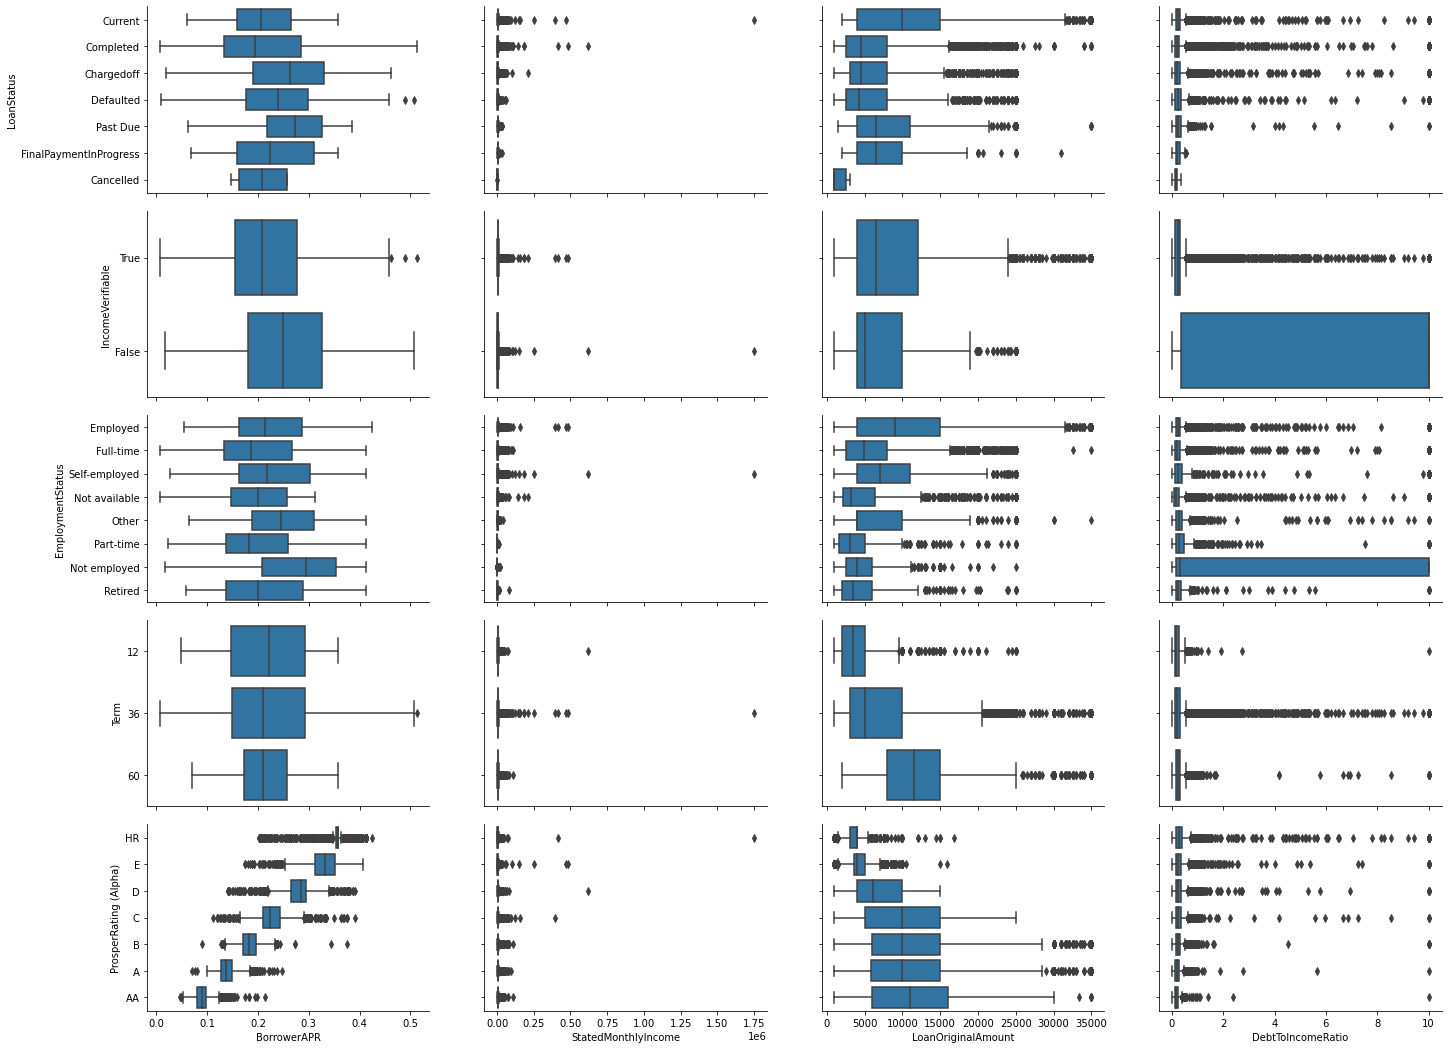

In [41]:
base_color = sb.color_palette()[0]
g = sb.PairGrid(data = loan_subset, x_vars =['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'DebtToIncomeRatio'],
               y_vars = ['LoanStatus', 'IncomeVerifiable', 'EmploymentStatus', 'Term', 'ProsperRating (Alpha)'])
g.map(sb.boxplot, color = base_color)
g.fig.set_size_inches(20,15); # wanted to get a better look by making the figure(s) bigger 

**From the matrices, we can see that the shorter the term, the higher the APR, but 36 and 60 months term seems to have about the same average APR. It's important to note that even though the mean may be able to the same, the range of APR for 36 months is much wider. Moving on to 'Employment Status', we can see that the ones considered 'not employed' has the highest average APR, while those who are 'full-time', 'part-time' and 'retired' have some of the lowest.**

**Next, we'll examine the 'IncomeVerifiable' column's relationship with APR. It seems that those whose income are not verified have a higher APR than those whose are. Moreover, the range of unverified income is much wider while the other one possesses outliers that reaches up to that range. Next, I want to examine the relationship between the loan status and APR. It seems that the less desirable statuses(ChargedOff, Past Due, Defaulted) all have higher APR on average.**

**Finally, we can see that as a borrower's rating improves, the APR gets lowered drastically. Therefore, we can conclude that the rating has a strong effect on the APR.**

### Categorical Variables
**Lastly, we will look at the relationship between each categorical variables.**

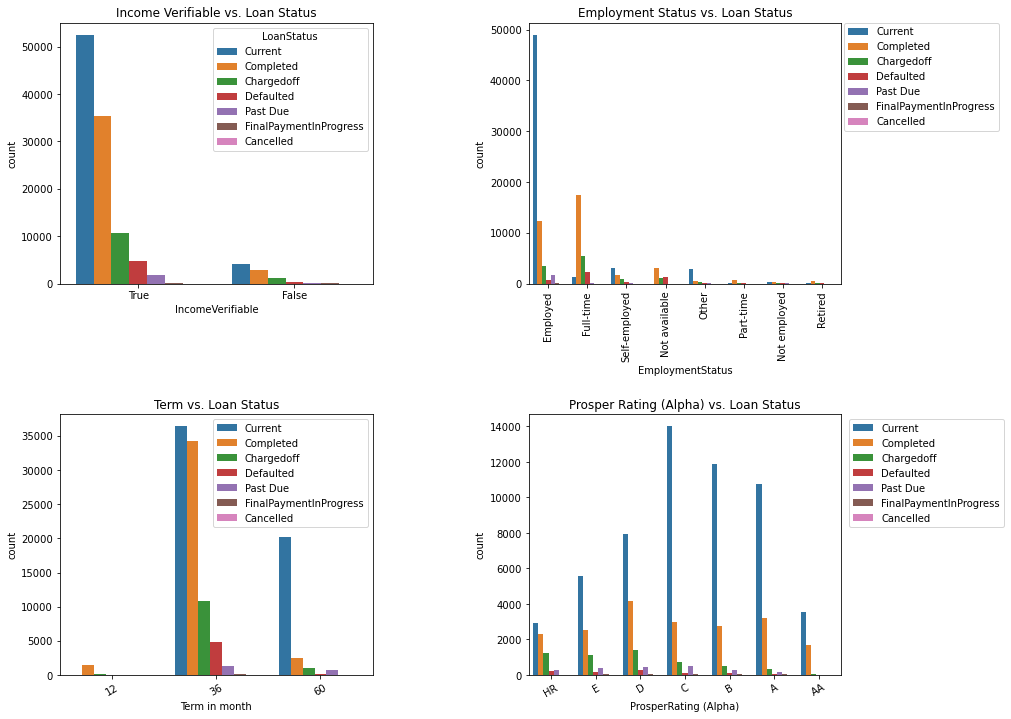

In [58]:
# Start by comparing 'LoanStatus' variable to the other categorical variables
rcParams['figure.figsize'] = 14, 12

#subplot 1
plt.subplot(2,2,1)
sb.countplot(data = loan_subset, x = 'IncomeVerifiable', hue = 'LoanStatus')
plt.title('Income Verifiable vs. Loan Status');


#subplot 2
plt.subplot(2,2,2)
sb.countplot(data = loan_subset, x = 'EmploymentStatus', hue = 'LoanStatus')
plt.xticks(rotation = 90)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.title('Employment Status vs. Loan Status');

#subplot 3
plt.subplot(2,2,3)
sb.countplot(data = loan_subset, x = 'Term', hue = 'LoanStatus')
plt.xticks(rotation = 30)
plt.legend(loc = 'upper right')
plt.xlabel('Term in month')
plt.title('Term vs. Loan Status');

#subplot 4
plt.subplot(2,2,4)
sb.countplot(data = loan_subset, x = 'ProsperRating (Alpha)', hue = 'LoanStatus')
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor=(1.01, 1))
plt.title('Prosper Rating (Alpha) vs. Loan Status');

plt.subplots_adjust(wspace=0.50, 
                    hspace=0.5)

**First, I have decided to explore the relationship between loan statuses and other variables. Starting from the top right, we can see that a vast majority of the loans were given to those whose income has been verified. In fact, we can see that it doesn't matter the loan status; the number of loans for each category of statuses in verified income will be many time larger than unverified. Moving on to the plot of the right, there isn't much information to derive from 'part-time', 'not employed' and 'retired', but we can conclude that almost all of the current loans are given to those who are considered employed. Those considered 'full-time' holds the most completed loans.**

**Next, at the bottom left, we can see that a vast majority of the loans are 36-terms. It seems like 36-month holds the most loans of each types. However, we can also see that there is quite a bit of current loans for 60-month term. Lastly, we can see the current loans make up a portion of each rating, as well as being the highest count. The next hgihest count across all rating is completed. We can also see that the majority of current loans are held by those with ratings, C - A.**

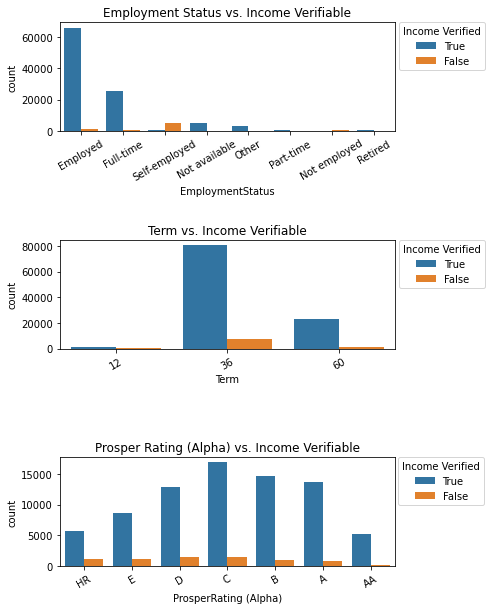

In [59]:
plt.figure(figsize = [6, 10])

#subplot 1
plt.subplot(3,1,1)
sb.countplot(data = loan_subset, x = 'EmploymentStatus', hue = 'IncomeVerifiable')
plt.legend(bbox_to_anchor=(1.27, 1),
           borderaxespad=0, title = "Income Verified")
plt.xticks(rotation = 30)
plt.title('Employment Status vs. Income Verifiable');

#subplot 2
plt.subplot(3,1,2)
sb.countplot(data = loan_subset, x = 'Term', hue = 'IncomeVerifiable')
plt.legend(bbox_to_anchor=(1.27, 1),
           borderaxespad=0, title = "Income Verified")
plt.xticks(rotation = 30)
plt.title('Term vs. Income Verifiable');

#subplot 3
plt.subplot(3,1,3)
sb.countplot(data = loan_subset, x = 'ProsperRating (Alpha)', hue = 'IncomeVerifiable')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0, title = "Income Verified")
plt.xticks(rotation = 30)
plt.title('Prosper Rating (Alpha) vs. Income Verifiable');

plt.subplots_adjust(hspace=1)

**Next, I have decided to explore the relationship between the 'IncomeVerified' column against other variables. Starting at the top and similair to the last exploration with employment status, there isn't enough data to show the interactions of 'part-time', 'not employed' and 'retired'. However, we can see that across the others that a majority of loans were given to those whose income were verfied. 'Self-employed' doesn't follow this; it seems that most loans in this category isn't verified.**

**Moving on to the next plot, that a majority of the loans are verfied and mostly seperated into 2 different terms: 36-month and 60-month, the former took the lion share.**

**This is a little surprising since the distribution shows a perfect bell-curve when examining verified income. The count is near the lowest for the worst rating 'HR', then steady increases up before hitting the highest count at rating 'C'. Then it begins to taper before hitting the lowest point at the best rating 'AA'. The distribution for unverified income isn't the same, however. From the worst rating, it remained about the same, tapering a little bit as the rating increases, but took a massive hit at the best rating.**

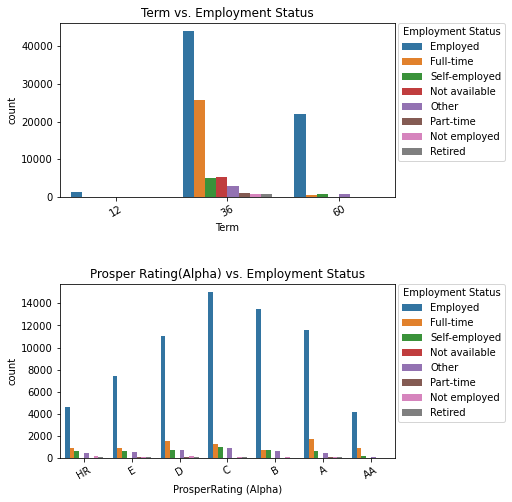

In [60]:
plt.figure(figsize = [6, 8])

#subplot 1
plt.subplot(2,1,1)
sb.countplot(data = loan_subset, x = 'Term', hue = 'EmploymentStatus')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0, title = "Employment Status")
plt.xticks(rotation = 30)
plt.title('Term vs. Employment Status');

#subplot 2
plt.subplot(2,1,2)
sb.countplot(data = loan_subset, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0, title = "Employment Status")
plt.xticks(rotation = 30)
plt.title('Prosper Rating(Alpha) vs. Employment Status');

plt.subplots_adjust(hspace=.5)

**Next, I have decided to explore the relationship between the 'EmploymentStatus' column against other variables. From the top distribution, we see that employed holds the most loans overall. Most of them are 36-month loans and 60 months. However, one interesting thing to note is the high the count for full-timmers taking out 36-month loans.**

**In the next graph, we see the employed has the highest count across all ratings, followed by full-time. It is also intersting to note that the distribution for employed seems to be normally distributed.**

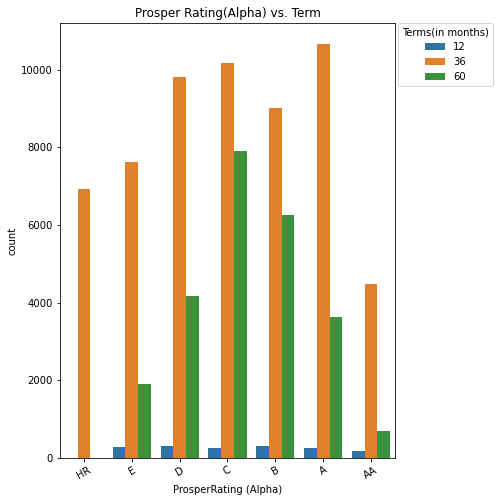

In [61]:
plt.figure(figsize = [6, 8])

#subplot 1
sb.countplot(data = loan_subset, x = 'ProsperRating (Alpha)', hue = 'Term')
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0, title = 'Terms(in months)')
plt.xticks(rotation = 30)
plt.title('Prosper Rating(Alpha) vs. Term');

**Lastly, I have decided to explore the last combination of relationships between the 'Term' column against ProsperRating (Alpha). As we know, there wasn't many 12-month loans to begin with. We see that it has been evenly distributed among all rating, except HR. Furthermore, the HR rating doesn't even have a single 60-month loan either.**

**Before moving on to my bivariate analysis, I want to examine the relationship between the APR with two other numeric variables: 'LoanOriginalAmount' and 'DebtToIncomeRatio'. Instead of a heatmap, I will be examining it with scatterplots.**

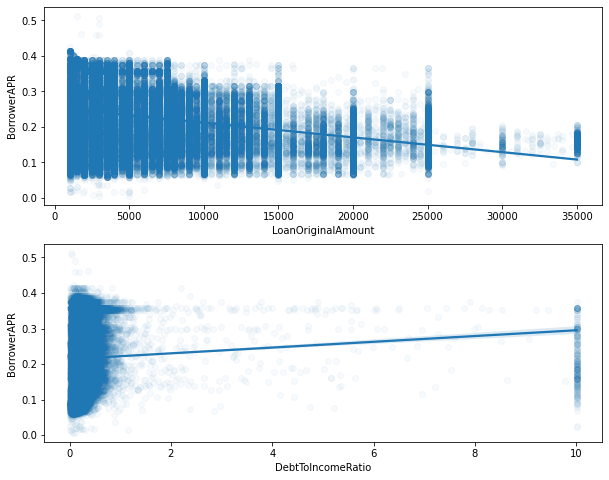

In [62]:
plt.figure(figsize = [10, 8])

plt.subplot(2,1,1)
sb.regplot(data = loan_subset, x = 'LoanOriginalAmount', y = 'BorrowerAPR', scatter_kws={'alpha': 1/30});

plt.subplot(2,1,2)
sb.regplot(data = loan_subset, x = 'DebtToIncomeRatio', y = 'BorrowerAPR', scatter_kws={'alpha': 1/30});

**Now we can answer the next question with these plots!**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
>**From the heatmap we conduct at the beginning, we found that the correlation coefficient between the loan amount and APRis -0.32, making moderate negative relationship. The higher the loan, the lower the APR. This can be seen on the first scatterplot that has been plotted.**

>**We also found the the correlation coefficient between the debt-to-income ratio and APR is 0.08, which makes it a weak, positive relationship. This can also be seen in the second scatterplot made.**

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

>**The relationship between Debt-to-Income Ratio and Stated Monthly Income is also negatively correlated.Something else we can make out is that the correlation between the original loan amount and stated monthly income is 0.20, meaning that it's positively correlated. This makes sense since the higher the income, the higher the loan you should be able to acquire. Furthermore, an interesting reationship between the rating and term. First, we see that there are only 36-month loans given to the 'HR' rating, the lowest one while other ratings have a healthy mix of all 3 terms.**

## Multivariate Exploration

**In this section, I want to explore how different variables can affect the borrowerAPR's relationship with another variable. First, I want to see how the rating, employment status and loan term would each individually affect the APR's relationship with the loan amount.**

In [63]:
num_var = ['BorrowerAPR', 'StatedMonthlyIncome', 'LoanOriginalAmount', 'DebtToIncomeRatio']
cat_var = ['LoanStatus', 'IncomeVerifiable', 'EmploymentStatus', 'Term', 'ProsperRating (Alpha)']

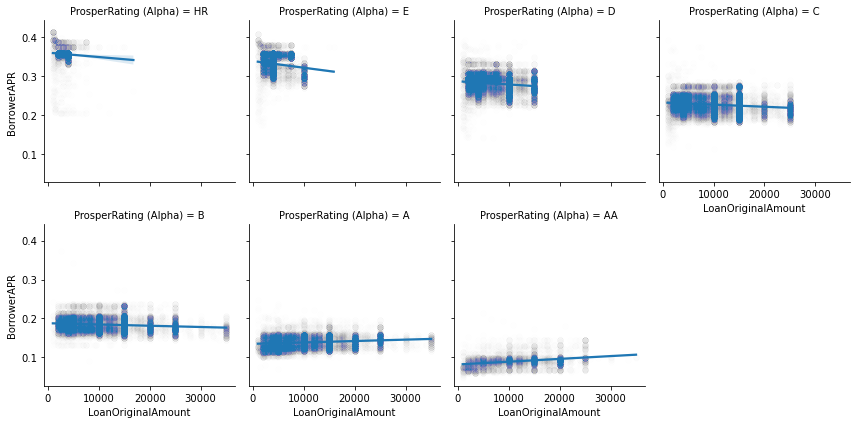

In [64]:
# https://seaborn.pydata.org/generated/seaborn.FacetGrid.html
g = sb.FacetGrid(data = loan_subset, col = 'ProsperRating (Alpha)', col_wrap = 4)
g.map(sb.regplot,'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.05, scatter_kws = {'alpha': 0.005});

**It seems that an individual's rating has some effect on the relationship between the original loan amount and APR. We can see the relationship gradually turn positive and get stronger as the rating increases.**

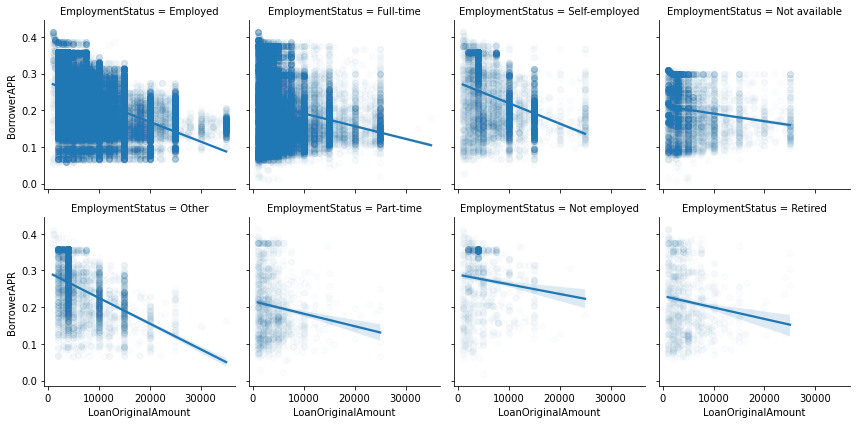

In [65]:
g = sb.FacetGrid(data = loan_subset, col = 'EmploymentStatus', col_wrap = 4)
g.map(sb.regplot,'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.05, scatter_kws = {'alpha': 0.02});

**There are some effect that employment status have on the relationship between the original loan amount and APR. However, it doesnt appear to be that big. The ones that are employed in some form(employed, full-time, self-employed) have a stronger, negative relationship while the others can be characterized as moderately negative.**

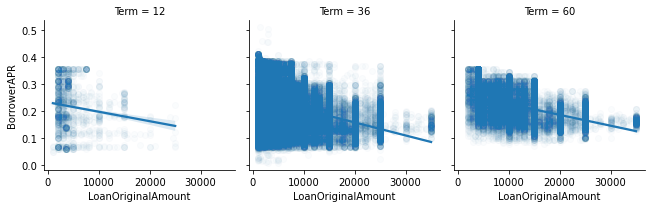

In [66]:
g = sb.FacetGrid(data = loan_subset, col = 'Term', col_wrap = 4)
g.map(sb.regplot,'LoanOriginalAmount', 'BorrowerAPR', x_jitter = 0.05, scatter_kws = {'alpha': 0.02});

**Term doesn't seem to have any effect on the relationship between the loan amount and APR.**



**Next, I would like to how a loan's term would affect APR across the different ratings. to do this, I will be creating a boxplot.**

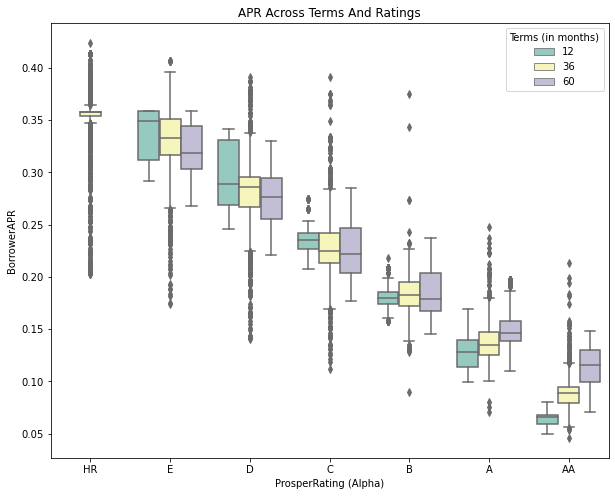

In [67]:
fig = plt.figure(figsize = [10, 8])
ax = sb.boxplot(x='ProsperRating (Alpha)', y='BorrowerAPR', hue='Term',
                 data=loan_subset, palette="Set3")
plt.title('APR Across Terms And Ratings')
plt.legend(title = 'Terms (in months)');

**This is interesting to see. For each individual term over every rating, the APR decreases as the rating increases. Typically the APR decreases when the term is longer. Though the rating HR may not show due to insufficient data, the ratings E-C follow this. When it gets to rating B and higher, the longer ther term, the higher the APR for each individual level. It is interesting to note the sheer amount of outliers for 12-month terms across all ratings. It seems that this type of loan is more personalized or customermized for the individual borrower.**

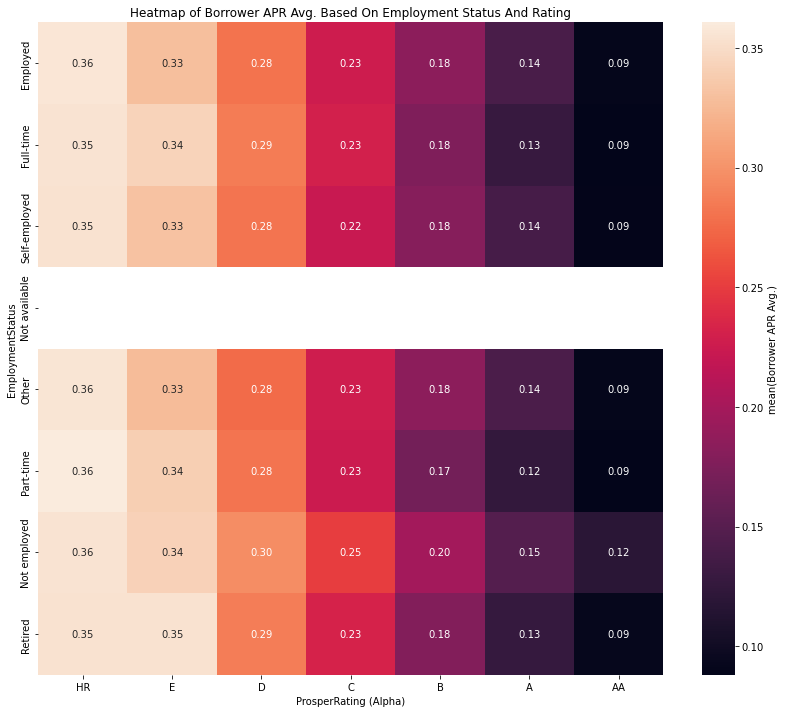

In [68]:
c_means = loan_subset.groupby(['ProsperRating (Alpha)', 'EmploymentStatus']).mean()['BorrowerAPR']
c_means = c_means.reset_index(name = 'Borrower APR Avg.')
c_means = c_means.pivot(index = 'EmploymentStatus', columns = 'ProsperRating (Alpha)',
                       values = 'Borrower APR Avg.')
sb.heatmap(c_means, annot = True, fmt = '.2f', cbar_kws = {'label': 'mean(Borrower APR Avg.)'})
plt.title('Heatmap of Borrower APR Avg. Based On Employment Status And Rating');

**Here, I have created a heatmap that displays the average interest rate based on rating and employment status. As expected, the unemployed has a slightly higher APR starting from rating D. However, most APR are pretty consistent with one another. For example, if you look through each rating column, you will find that each status only has a difference of 0.01 or 0.02 when compated to a different status. Obiviously, we also see no data plotted for the 'not avaiable' employment status. This could mean that loans are not given to those who are not willing to share their current status.**

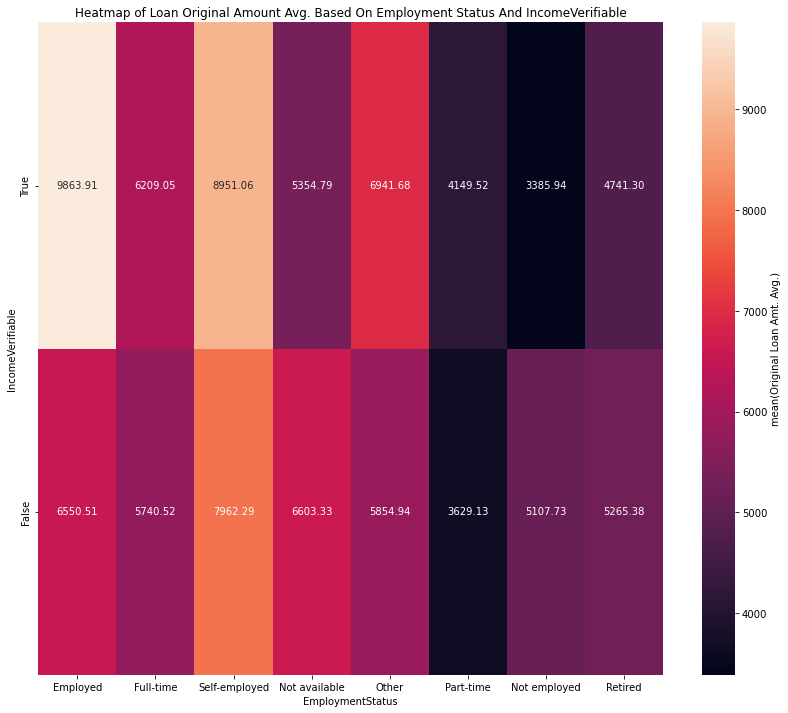

In [69]:
c_means = loan_subset.groupby(['IncomeVerifiable', 'EmploymentStatus']).mean()['LoanOriginalAmount']
c_means = c_means.reset_index(name = 'LoanOriginalAmount')
c_means = c_means.pivot(index = 'IncomeVerifiable', columns = 'EmploymentStatus',
                       values = 'LoanOriginalAmount')
sb.heatmap(c_means, annot = True, fmt = '.2f', cbar_kws = {'label': 'mean(Original Loan Amt. Avg.)'})
plt.title('Heatmap of Loan Original Amount Avg. Based On Employment Status And IncomeVerifiable');

**From the heatmap, we can tell that on average those with verfied income borrow more money than those with unverified, though that is not true in some cases such as the column 'other' and 'not available'. However, what is surprising is the higher amount borrowed by those with unverified income that are considered 'retired' and 'unemployed'. I would've expected those with unverified income to borrow less, especially in those situation. However, it seems that they would borrow just as much as an income-unverified full-time worker.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>**An individual's rating has some effet on the relationship between the original loan amount and APR. The relationship gradually turn positive and get stronger as the rating increases. Furthermore, we found that there are some effect that employment status have on the relationship between the original loan amount and APR. However, it doesnt appear to be that big. The ones that are employed in some form(employed, full-time, self-employed) have a stronger, negative relationship while the others can be characterized as moderately negative. Lastly, we found that term doesn't seem to have any effect on the relationship between the loan amount and APR.**

>**Next, I examined how a loan's term would affect APR across the different ratings. For each individual term over every rating, the APR decreases as the rating increases. Typically the APR decreases when the term is longer. Though the rating HR may not show due to insufficient data, the ratings E-C follow this. When it gets to rating B and higher, the longer ther term, the higher the APR for each individual level. It is interesting to note the sheer amount of outliers for 12-month terms across all ratings. It seems that this type of loan is more personalized or customermized for the individual borrower.**

### Were there any interesting or surprising interactions between features?

> **One surprising finding is the gradual change from a negative relationship to a positive one when examining the effect of ratings on the relationship between loan amount and APR. Between rating HR and B, we see a negative relationship. As we increase further, it becomes positive. Another interesting finding is APR decrease with increase of term for those with rating HR-C, but those with ratings B-AA, the APR increases with an increase in term.**